* **Author**: Andrea Ziqing Gallardo Bendito

* **Project**: Bachelor Thesis - *Separación de fuentes musicales en conjuntos de cámara de música clásica*

* **GitHub Repo**: [MusicSourceSep](https://github.com/andrezg98/MusicSourceSep)

In this Notebook we are going to adapt the **Bach10 dataset** to train the ***U-Net* model** implemented by the [Spleeter](https://research.deezer.com/projects/spleeter.html) library created by [Deezer](https://www.deezer.com/es/).



---



## **Project repository download and Library installations**

In [ ]:
!pip install spleeter -q

### **Imports**

In [ ]:
# Imports
import numpy as np
import librosa
import librosa.display
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from IPython.display import Audio
from google.colab import files
from pathlib import Path
import matplotlib.pyplot as plt

# Duration
import wave
import contextlib

In [ ]:
# To be able to write in bold format in the code
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

## **Dataset Downloads**

* **Bach10 Dataset**
  
    Accessing the dataset stored in my Google Drive:

In [ ]:
%cd /content/drive/MyDrive/ING. SONIDO E IMAGEN/TFG/Datasets

/content/drive/MyDrive/ING. SONIDO E IMAGEN/TFG/Datasets


> **Note**: To download the dataset for the first time, you can access [here](https://https://docs.google.com/forms/d/e/1FAIpQLSfJ1IdB7Ws2_m0wkkvS1hGm5GevGS3QmqBIoxiGDbw93yoPLQ/viewform?embedded=true&formkey=dGU3cmRlb1Q4RU5zTGNZeHUyRGFwaWc6MQ). The authors ask you to fill in a short form in order to keep track of the use of the dataset. Once downloaded, you can easily unzip and access it as follows. The dataset will be saved in the path you have specified.

In [ ]:
# !unzip bach10_dataset_compressed.zip



---



##  **Prepare the source material for the model**
Let's prepare our dataset (**Bach10**) to obtain the `Bach10_train.csv`, `Bach10_validation.csv` and `Bach10_test.csv` needed to train the ***U-Net* model**.

In [ ]:
# Declare the variables
AuSep = {'bassoon': list(), 'clarinet': list(),
         'saxphone': list(), 'violin': list()}    # Separate audio list of each instrument
AuMix = list()                                    # Mix audio list
pieces = list()                                   # Name of the pieces
duration = list()                                 # Duration of the pieces
count = 0

# We go through the files in the folders and save them in each list
for dirpath, dirnames, filenames in os.walk("Bach10"):
    if count == 0:
        pieces = dirnames
    if count > 0:
        for filename in filenames:
            filename = pieces[count-1] + "/" + filename
            if filename.endswith('.wav'):
                if len(filename.split('-')) == 3:
                    AuMix.append(filename)
                    AuMix.sort(reverse=False)
                    fname = 'Bach10/' + filename
                    with contextlib.closing(wave.open(fname,'r')) as f:
                        frames = f.getnframes()
                        rate = f.getframerate()
                        duration.append(frames/float(rate)) # seconds
                        duration.sort(reverse=False)
                else:
                    if filename.split('-')[3] == 'bassoon.wav':
                        AuSep['bassoon'].append(filename)
                        AuSep['bassoon'].sort(reverse=False) 
                    elif filename.split('-')[3] == 'clarinet.wav':
                        AuSep['clarinet'].append(filename)
                        AuSep['clarinet'].sort(reverse=False)
                    elif filename.split('-')[3] == 'saxphone.wav':
                        AuSep['saxphone'].append(filename)
                        AuSep['saxphone'].sort(reverse=False)
                    elif filename.split('-')[3] == 'violin.wav':
                        AuSep['violin'].append(filename)
                        AuSep['violin'].sort(reverse=False)
                    else:
                        pass
            else:
                pass
    count += 1
    pieces.sort(reverse=False)

printmd("**Name of the pieces:**")
print(pieces)
printmd("**Separate Audio:**")
print(AuSep)
printmd("**Mix Audio:**")
print(AuMix)
printmd("**Duration:**")
print(duration)

**Name of the pieces:**

['01-AchGottundHerr', '02-AchLiebenChristen', '03-ChristederdubistTagundLicht', '04-ChristeDuBeistand', '05-DieNacht', '06-DieSonne', '07-HerrGott', '08-FuerDeinenThron', '09-Jesus', '10-NunBitten', 'Code']


**Separate Audio:**

{'bassoon': ['01-AchGottundHerr/01-AchGottundHerr-bassoon.wav', '02-AchLiebenChristen/02-AchLiebenChristen-bassoon.wav', '03-ChristederdubistTagundLicht/03-ChristederdubistTagundLicht-bassoon.wav', '04-ChristeDuBeistand/04-ChristeDuBeistand-bassoon.wav', '05-DieNacht/05-DieNacht-bassoon.wav', '06-DieSonne/06-DieSonne-bassoon.wav', '07-HerrGott/07-HerrGott-bassoon.wav', '08-FuerDeinenThron/08-FuerDeinenThron-bassoon.wav', '09-Jesus/09-Jesus-bassoon.wav', '10-NunBitten/10-NunBitten-bassoon.wav'], 'clarinet': ['01-AchGottundHerr/01-AchGottundHerr-clarinet.wav', '02-AchLiebenChristen/02-AchLiebenChristen-clarinet.wav', '03-ChristederdubistTagundLicht/03-ChristederdubistTagundLicht-clarinet.wav', '04-ChristeDuBeistand/04-ChristeDuBeistand-clarinet.wav', '05-DieNacht/05-DieNacht-clarinet.wav', '06-DieSonne/06-DieSonne-clarinet.wav', '07-HerrGott/07-HerrGott-clarinet.wav', '08-FuerDeinenThron/08-FuerDeinenThron-clarinet.wav', '09-Jesus/09-Jesus-clarinet.wav', '10-NunBitten/10-NunBitten-clarin

**Mix Audio:**

['01-AchGottundHerr/01-AchGottundHerr.wav', '02-AchLiebenChristen/02-AchLiebenChristen.wav', '03-ChristederdubistTagundLicht/03-ChristederdubistTagundLicht.wav', '04-ChristeDuBeistand/04-ChristeDuBeistand.wav', '05-DieNacht/05-DieNacht.wav', '06-DieSonne/06-DieSonne.wav', '07-HerrGott/07-HerrGott.wav', '08-FuerDeinenThron/08-FuerDeinenThron.wav', '09-Jesus/09-Jesus.wav', '10-NunBitten/10-NunBitten.wav']


**Duration:**

[25.226643990929706, 25.363333333333333, 29.355374149659863, 32.566371882086166, 33.23877551020408, 33.28675736961451, 35.80780045351474, 37.39122448979592, 40.535873015873015, 41.66514739229025]


After getting the required separated and mixed audio files, we can model the `.csv` files:

In [ ]:
# DataFrame
df = pd.DataFrame(np.array([AuMix, AuSep['bassoon'], AuSep['clarinet'], AuSep['saxphone'], AuSep['violin'], duration]).T, columns=['mix_path','bassoon_path', 'clarinet_path', 'saxphone_path', 'violin_path', 'duration'])

First, divide our data set into a training and test set.

In [ ]:
bach10_Train, bach10_test = train_test_split(df, test_size=0.1)

Next, we split our training set into training set and validation set.

In [ ]:
bach10_train, bach10_validation = train_test_split(bach10_Train, test_size=0.1)

In [ ]:
# Save the .csv files
bach10_train.to_csv(r'Bach10_spleeter/bach10_train.csv', index=False)
bach10_validation.to_csv(r'Bach10_spleeter/bach10_validation.csv', index=False)

Let's see the result of each set created.

In [ ]:
bach10_train

,mix_path,bassoon_path,clarinet_path,saxphone_path,violin_path,duration
2,03-ChristederdubistTagundLicht/03-Christederdu...,03-ChristederdubistTagundLicht/03-Christederdu...,03-ChristederdubistTagundLicht/03-Christederdu...,03-ChristederdubistTagundLicht/03-Christederdu...,03-ChristederdubistTagundLicht/03-Christederdu...,29.355374149659863
7,08-FuerDeinenThron/08-FuerDeinenThron.wav,08-FuerDeinenThron/08-FuerDeinenThron-bassoon.wav,08-FuerDeinenThron/08-FuerDeinenThron-clarinet...,08-FuerDeinenThron/08-FuerDeinenThron-saxphone...,08-FuerDeinenThron/08-FuerDeinenThron-violin.wav,37.39122448979592
6,07-HerrGott/07-HerrGott.wav,07-HerrGott/07-HerrGott-bassoon.wav,07-HerrGott/07-HerrGott-clarinet.wav,07-HerrGott/07-HerrGott-saxphone.wav,07-HerrGott/07-HerrGott-violin.wav,35.80780045351474
3,04-ChristeDuBeistand/04-ChristeDuBeistand.wav,04-ChristeDuBeistand/04-ChristeDuBeistand-bass...,04-ChristeDuBeistand/04-ChristeDuBeistand-clar...,04-ChristeDuBeistand/04-ChristeDuBeistand-saxp...,04-ChristeDuBeistand/04-ChristeDuBeistand-viol...,32.566371882086166
5,06-DieSonne/06-DieSonne.wav,06-DieSonne/06-DieSonne-bassoon.wav,06-DieSonne/06-DieSonne-clarinet.wav,06-DieSonne/06-DieSonne-saxphone.wav,06-DieSonne/06-DieSonne-violin.wav,33.28675736961451
0,01-AchGottundHerr/01-AchGottundHerr.wav,01-AchGottundHerr/01-AchGottundHerr-bassoon.wav,01-AchGottundHerr/01-AchGottundHerr-clarinet.wav,01-AchGottundHerr/01-AchGottundHerr-saxphone.wav,01-AchGottundHerr/01-AchGottundHerr-violin.wav,25.226643990929706
9,10-NunBitten/10-NunBitten.wav,10-NunBitten/10-NunBitten-bassoon.wav,10-NunBitten/10-NunBitten-clarinet.wav,10-NunBitten/10-NunBitten-saxphone.wav,10-NunBitten/10-NunBitten-violin.wav,41.66514739229025
8,09-Jesus/09-Jesus.wav,09-Jesus/09-Jesus-bassoon.wav,09-Jesus/09-Jesus-clarinet.wav,09-Jesus/09-Jesus-saxphone.wav,09-Jesus/09-Jesus-violin.wav,40.535873015873015


In [ ]:
bach10_validation

,mix_path,bassoon_path,clarinet_path,saxphone_path,violin_path,duration
4,05-DieNacht/05-DieNacht.wav,05-DieNacht/05-DieNacht-bassoon.wav,05-DieNacht/05-DieNacht-clarinet.wav,05-DieNacht/05-DieNacht-saxphone.wav,05-DieNacht/05-DieNacht-violin.wav,33.23877551020408


In [ ]:
bach10_test

,mix_path,bassoon_path,clarinet_path,saxphone_path,violin_path,duration
1,02-AchLiebenChristen/02-AchLiebenChristen.wav,02-AchLiebenChristen/02-AchLiebenChristen-bass...,02-AchLiebenChristen/02-AchLiebenChristen-clar...,02-AchLiebenChristen/02-AchLiebenChristen-saxp...,02-AchLiebenChristen/02-AchLiebenChristen-viol...,25.363333333333333


Once we have our data set ready for input to the separation model, it's time to move on to the training phase.



---



# **Training** 

### ***U-Net Model***

To train the U-Net model implemented by the Spleeter library, it is necessary to change the training parameters in the `config.json` file that had to be created previously.

Example of `config.json`:

> ```
{
    "train_csv": "bach10_train.csv",
    "validation_csv": "bach10_validation.csv",
    "model_dir": "unet_model_base",
    "mix_name": "mix",
    "instrument_list": ["bassoon", "clarinet", "saxphone", "violin"],
    "sample_rate":44100,
    "frame_length":4096,
    "frame_step":1024,
    "T":512,
    "F":1024,
    "n_channels":2,
    "n_chunks_per_song":5,
    "separation_exponent":2,
    "mask_extension":"zeros",
    "learning_rate": 1e-4,
    "batch_size":4,
    "training_cache":"cache/training/",
    "validation_cache":"cache/validation/",
    "train_max_steps": 1500000,
    "throttle_secs":600,
    "random_seed":0,
    "save_checkpoints_steps":300,
    "save_summary_steps":5,
    "model":{
        "type":"unet.unet",
        "params":{
               "conv_activation":"ELU",
               "deconv_activation":"ELU"
        }
    }
}
```





> **Note**: change the name of the model if modified any parameter of `config.json`

In [ ]:
# Model name: unet_model_base
!spleeter train --verbose -p "Bach10_spleeter/bach10_config.json" -d "Bach10"

INFO:tensorflow:Using config: {'_model_dir': 'unet_model_base', '_tf_random_seed': 0, '_save_summary_steps': 5, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.45
}
, '_keep_checkpoint_max': 2, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 10, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:spleeter:Start model training
INFO:tensorflow:Not using Distribute Coordinator.
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The

We move the new model (with the name defined in `config.json`) to the *models* folder of *Spleeter*.

In [ ]:
!mv unet_model_base/ "Bach10_spleeter/models/"



---



# **Separation**

First, let's try the separation of a pre-trained model of the library.

### ***4-stems model***

In [ ]:
!spleeter separate -o "Bach10_spleeter/outs/AM Contra - Heart Peripheral_model_4stems" -p spleeter:4stems "Other Datasets/MUSDB18WAV/test/AM Contra - Heart Peripheral/mixture.wav"

In [ ]:
# Get estimated sources
path_vocals_est = Path("Bach10_spleeter/outs/AM Contra - Heart Peripheral_model_4stems/mixture/vocals.wav")
path_drums_est = Path("Bach10_spleeter/outs/AM Contra - Heart Peripheral_model_4stems/mixture/drums.wav")
path_bass_est = Path("Bach10_spleeter/outs/AM Contra - Heart Peripheral_model_4stems/mixture/bass.wav")
path_other_est = Path("Bach10_spleeter/outs/AM Contra - Heart Peripheral_model_4stems/mixture/other.wav")

vocals_estimated, sr = librosa.load(path_vocals_est, duration=25.0) # 25 sec
drums_estimated, sr = librosa.load(path_drums_est, duration=25.0) # 25 sec
bass_estimated, sr = librosa.load(path_bass_est, duration=25.0) # 25 sec
other_estimated, sr = librosa.load(path_other_est, duration=25.0) # 25 sec

Let's check the separate audio outputs.

**Vocals**

In [ ]:
Audio('Bach10_spleeter/outs/AM Contra - Heart Peripheral_model_4stems/mixture/vocals.wav')

[Text(0.5, 1.0, 'Mel-frequency Spectrogram from Vocals Estimated Source')]

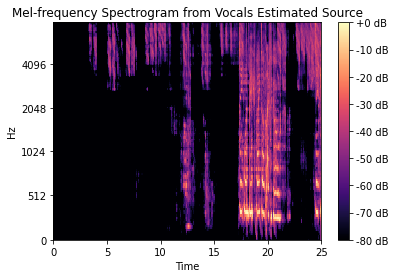

In [ ]:
# Mel Spectrogram from Vocals Estimated Source
S = librosa.feature.melspectrogram(y=vocals_estimated, sr=sr, n_mels=128, fmax=8000)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency Spectrogram from Vocals Estimated Source')

**Drums**

In [ ]:
Audio('Bach10_spleeter/outs/AM Contra - Heart Peripheral_model_4stems/mixture/drums.wav')

[Text(0.5, 1.0, 'Mel-frequency Spectrogram from Drums Estimated Source')]

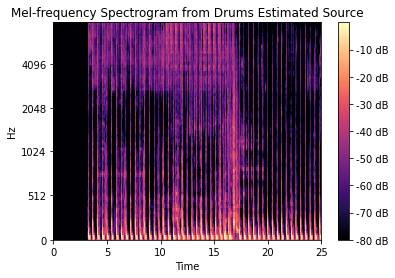

In [ ]:
# Mel Spectrogram from Drums Estimated Source
S = librosa.feature.melspectrogram(y=drums_estimated, sr=sr, n_mels=128, fmax=8000)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency Spectrogram from Drums Estimated Source')

**Bass**

In [ ]:
Audio('Bach10_spleeter/outs/AM Contra - Heart Peripheral_model_4stems/mixture/bass.wav')

[Text(0.5, 1.0, 'Mel-frequency Spectrogram from Bass Estimated Source')]

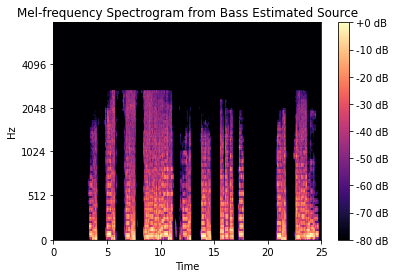

In [ ]:
# Mel Spectrogram from Bass Estimated Source
S = librosa.feature.melspectrogram(y=bass_estimated, sr=sr, n_mels=128, fmax=8000)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency Spectrogram from Bass Estimated Source')

**Other**

In [ ]:
Audio('Bach10_spleeter/outs/AM Contra - Heart Peripheral_model_4stems/mixture/other.wav')

[Text(0.5, 1.0, 'Mel-frequency Spectrogram from Other Estimated Source')]

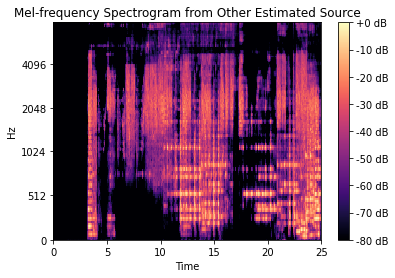

In [ ]:
# Mel Spectrogram from Other Estimated Source
S = librosa.feature.melspectrogram(y=other_estimated, sr=sr, n_mels=128, fmax=8000)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency Spectrogram from Other Estimated Source')

Now let's see how our trained model separates.

### ***U-Net Model***

We will evaluate the separation of our model with the test set created earlier.

In [ ]:
test_path = "Bach10/" + bach10_test.mix_path
print(test_path)

1    Bach10/02-AchLiebenChristen/02-AchLiebenChrist...
Name: mix_path, dtype: object


In [ ]:
!spleeter separate -o "outs/out_unet_model_base" -p "bach10_config.json" "Bach10/02-AchLiebenChristen/02-AchLiebenChristen.wav"

**Note**: If the audio files are very heavy, execute the following two cells to download the files locally.

In [ ]:
!zip -r "out_unet_model_base.zip" "outs/out_unet_model_base"

In [ ]:
# Download files
files.download("out_unet_model_base.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Evaluation**



After training, it's time to evaluate the model separation.

### **MUS eval**

In [ ]:
# Try to use Spleeter eval
!python -m spleeter evaluate -p "Bach10_spleeter/bach10_config.json" --mus_dir "Bach10" -o unet_model_base_eval --mwf

### **MIR eval separation**

In [ ]:
!pip install mir_eval

**Bach 10 Dataset**

In [ ]:
%cd "Bach10"

/content/drive/My Drive/ING. SONIDO E IMAGEN/TFG/Datasets/Bach10_v1.1


In [ ]:
# Get reference sources

from pathlib import Path

path_bassoon_ref = Path(AuSep['bassoon'][0])
path_clarinet_ref = Path(AuSep['clarinet'][0])
path_saxphone_ref = Path(AuSep['saxphone'][0])
path_violin_ref = Path(AuSep['violin'][0])

bassoon_reference, sr = librosa.load(path_bassoon_ref, duration=25.0) # 25 segundos
clarinet_reference, sr = librosa.load(path_clarinet_ref, duration=25.0)
saxphone_reference, sr = librosa.load(path_saxphone_ref, duration=25.0)
violin_reference, sr = librosa.load(path_violin_ref, duration=25.0)

reference_sources = np.array([bassoon_reference, clarinet_reference, saxphone_reference, violin_reference])

In [ ]:
%cd ../Bach10_spleeter/outs/

/content/drive/My Drive/ING. SONIDO E IMAGEN/TFG/MusicSourceSep/outs


In [ ]:
# Get estimated sources

path_bassoon_est = Path("01-AchGottundHerr_model_2/01-AchGottundHerr/bassoon.wav")
path_clarinet_est = Path("01-AchGottundHerr_model_2/01-AchGottundHerr/clarinet.wav")
path_saxphone_est = Path("01-AchGottundHerr_model_2/01-AchGottundHerr/saxphone.wav")
path_violin_est = Path("01-AchGottundHerr_model_2/01-AchGottundHerr/violin.wav")

bassoon_estimated, sr = librosa.load(path_bassoon_est, duration=25.0) # 25 segundos
clarinet_estimated, sr = librosa.load(path_clarinet_est, duration=25.0)
saxphone_estimated, sr = librosa.load(path_saxphone_est, duration=25.0)
violin_estimated, sr = librosa.load(path_violin_est, duration=25.0)

estimated_sources = np.array([bassoon_estimated, clarinet_estimated, saxphone_estimated, violin_estimated])

Once the reference and estimated sources were obtained, we performed the evaluation.

In [ ]:
import mir_eval
(SDR, SIR, SAR, PERM) = mir_eval.separation.bss_eval_sources(reference_sources, estimated_sources, compute_permutation=True)

print("-----------------------------------")
print("Source-to-Distortion Ratio (SDR):")
print("-----------------------------------")
print("Bassoon: %f " %SDR[0])
print("Clarinet: %f " %SDR[1])
print("Saxphone: %f " %SDR[2])
print("Violin: %f " %SDR[3])

print("-----------------------------------")
print("Source-to-Interference Ratio (SIR):")
print("-----------------------------------")
print("Bassoon: %f " %SIR[0])
print("Clarinet: %f " %SIR[1])
print("Saxphone: %f " %SIR[2])
print("Violin: %f " %SIR[3])

print("-----------------------------------")
print("Source-to-Artifact Ratio (SAR):")
print("-----------------------------------")
print("Bassoon: %f " %SAR[0])
print("Clarinet: %f " %SAR[1])
print("Saxphone: %f " %SAR[2])
print("Violin: %f " %SAR[3])

print("-----------------------------------")
print("PERM:")
print("-----------------------------------")
print("Bassoon: %f " %PERM[0])
print("Clarinet: %f " %PERM[1])
print("Saxphone: %f " %PERM[2])
print("Violin: %f " %PERM[3])


Source-to-Distortion Ratio (SDR):
Bassoon: -17.001879 
Clarinet: -16.720611 
Saxphone: -17.103840 
Violin: -27.594892 
Source-to-Interference Ratio (SIR):
Bassoon: 2.682824 
Clarinet: 3.521045 
Saxphone: 2.403258 
Violin: -12.129491 
Source-to-Artifact Ratio (SAR):
Bassoon: -15.082089 
Clarinet: -15.082089 
Saxphone: -15.082088 
Violin: -15.082090 
PERM:
Bassoon: 3.000000 
Clarinet: 0.000000 
Saxphone: 1.000000 
Violin: 2.000000 


In [ ]:
(SDR, ISR, SIR, SAR, PERM) = mir_eval.separation.bss_eval_images_framewise(reference_sources, estimated_sources, window=1323000, hop=661500, compute_permutation=False)

In [ ]:
score = mir_eval.separation.evaluate(reference_sources, estimated_sources)